   anime_id                             Name             English name  \
0         1                     Cowboy Bebop             Cowboy Bebop   
1         5  Cowboy Bebop: Tengoku no Tobira  Cowboy Bebop: The Movie   
2         6                           Trigun                   Trigun   
3         7               Witch Hunter Robin       Witch Hunter Robin   
4         8                   Bouken Ou Beet   Beet the Vandel Buster   

                         Other name Score  \
0                         カウボーイビバップ  8.75   
1                    カウボーイビバップ 天国の扉  8.38   
2                             トライガン  8.22   
3  Witch Hunter ROBIN (ウイッチハンターロビン)  7.25   
4                            冒険王ビィト  6.94   

                                 Genres  \
0         Action, Award Winning, Sci-Fi   
1                        Action, Sci-Fi   
2             Action, Adventure, Sci-Fi   
3  Action, Drama, Mystery, Supernatural   
4      Adventure, Fantasy, Supernatural   

                               

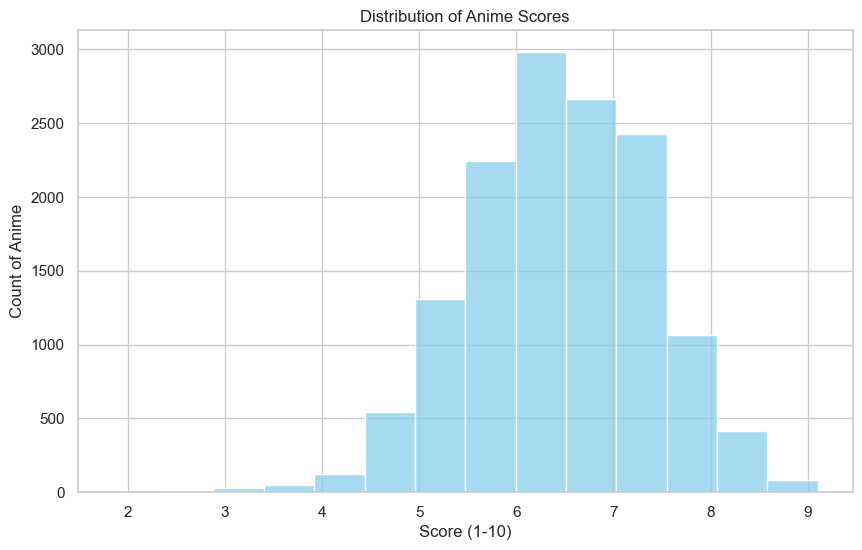

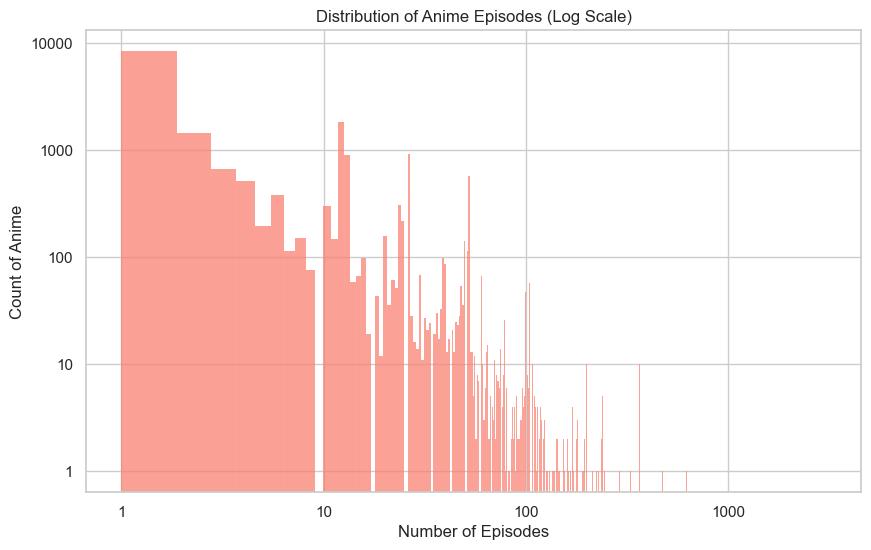

C:\Users\mukun\AppData\Local\Temp\ipykernel_5704\1517529883.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_anime, x='Type', order=df_anime['Type'].value_counts().index, palette='viridis')


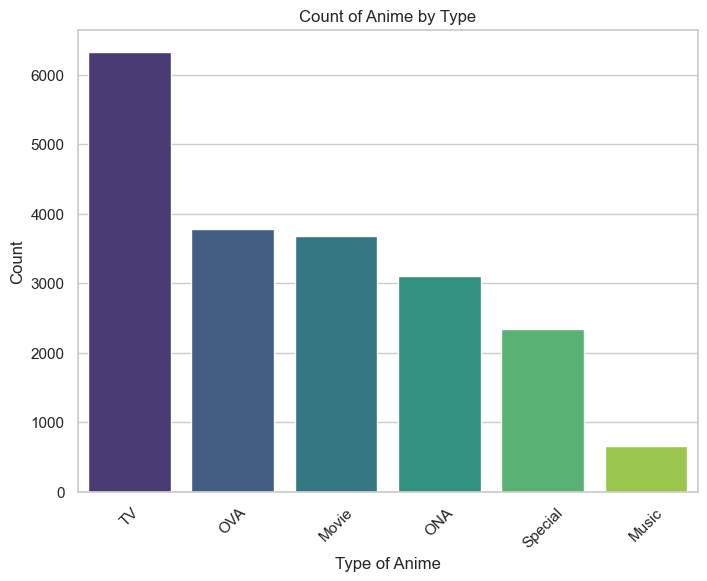

C:\Users\mukun\AppData\Local\Temp\ipykernel_5704\1517529883.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


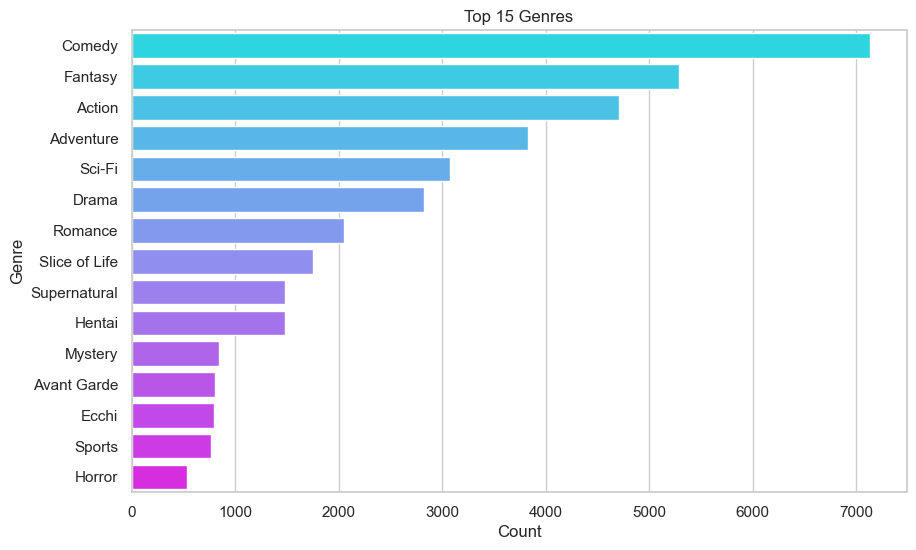

C:\Users\mukun\AppData\Local\Temp\ipykernel_5704\1517529883.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


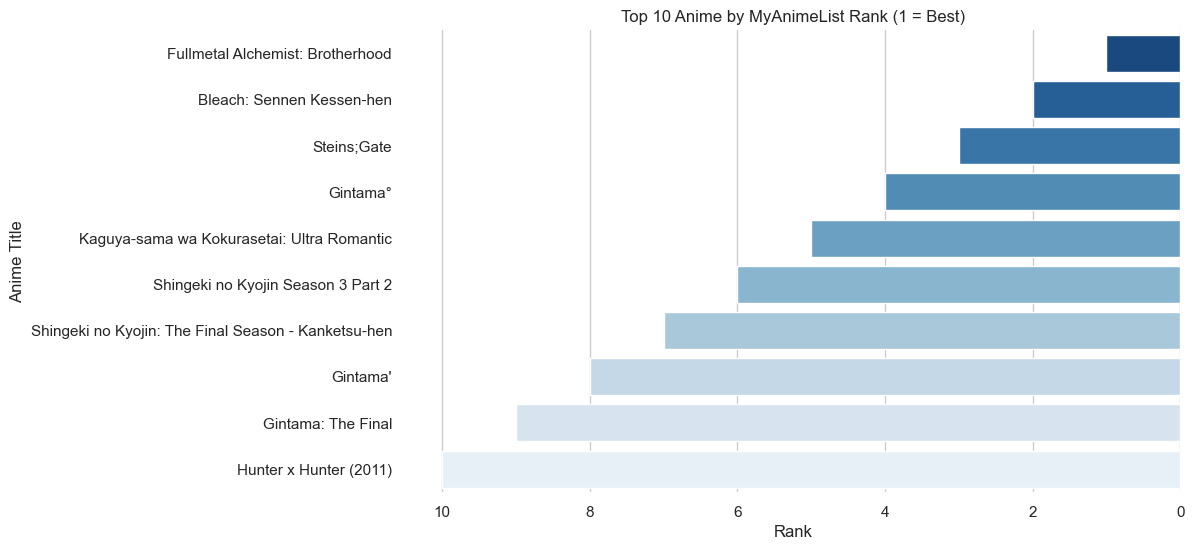

C:\Users\mukun\AppData\Local\Temp\ipykernel_5704\1517529883.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


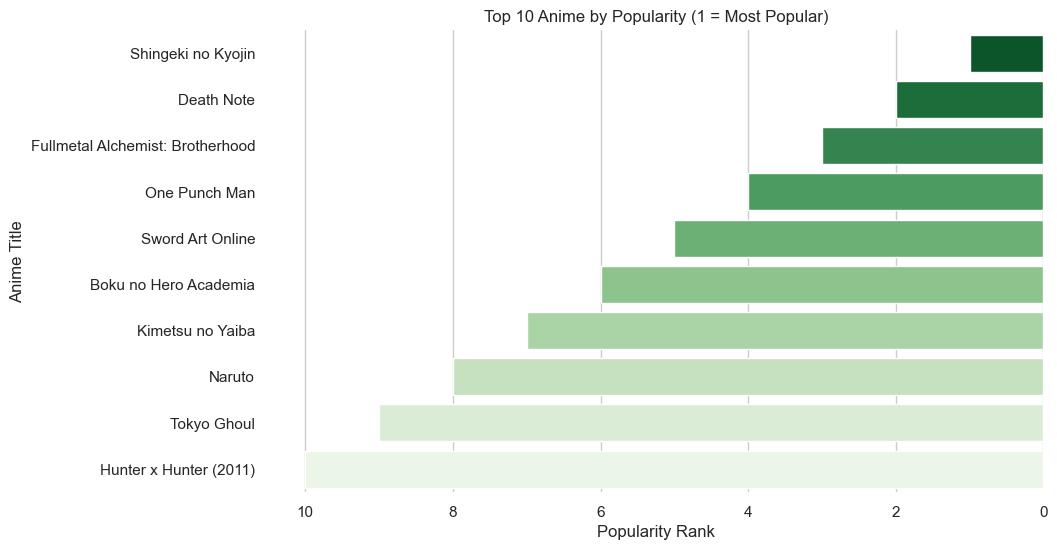

C:\Users\mukun\AppData\Local\Temp\ipykernel_5704\1517529883.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


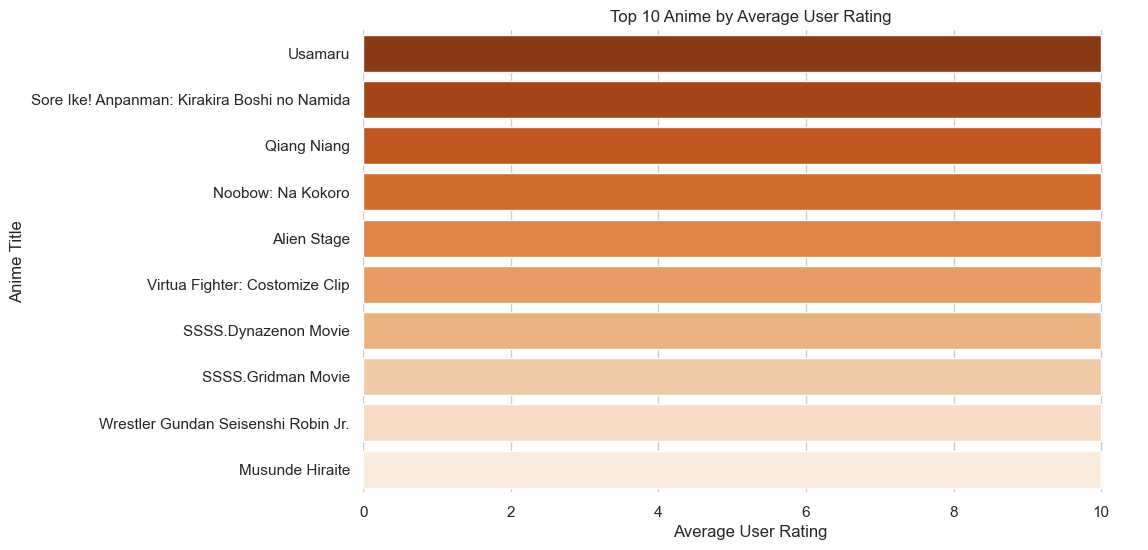

C:\Users\mukun\AppData\Local\Temp\ipykernel_5704\1517529883.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


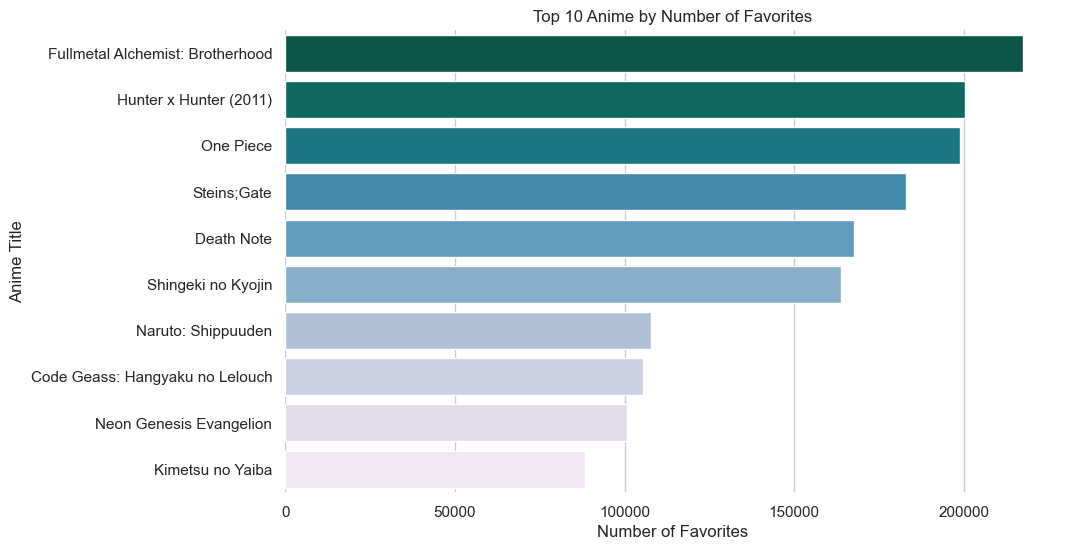

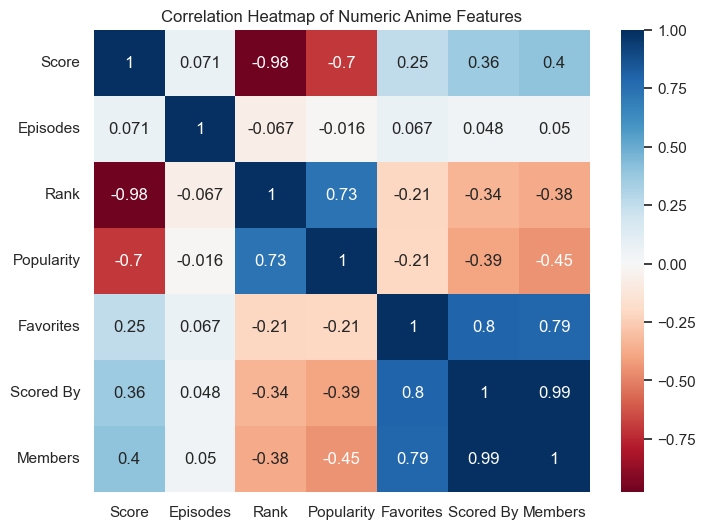

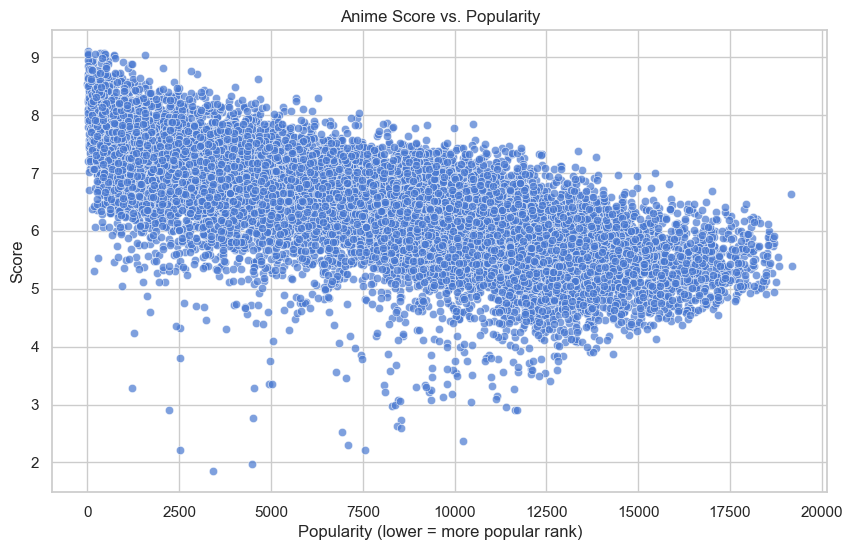

C:\Users\mukun\AppData\Local\Temp\ipykernel_5704\1517529883.py:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_anime, x='Type', y='Score', palette='Set2')


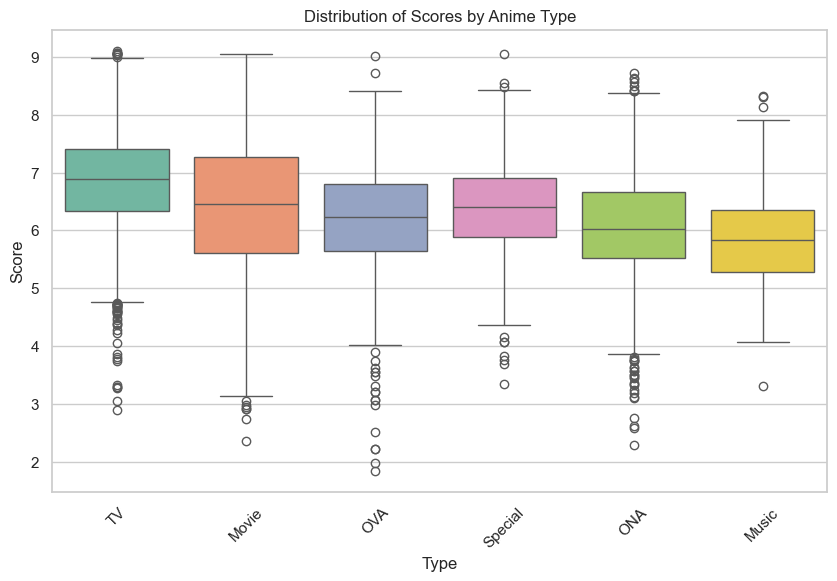

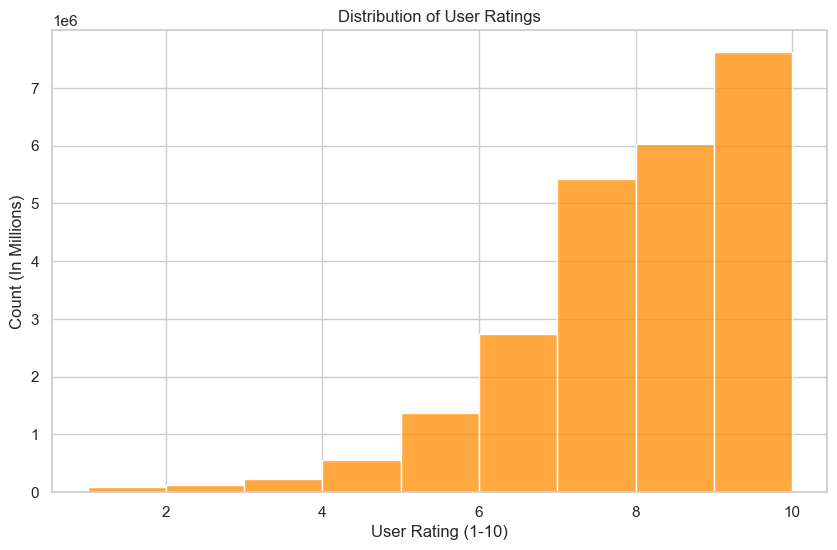

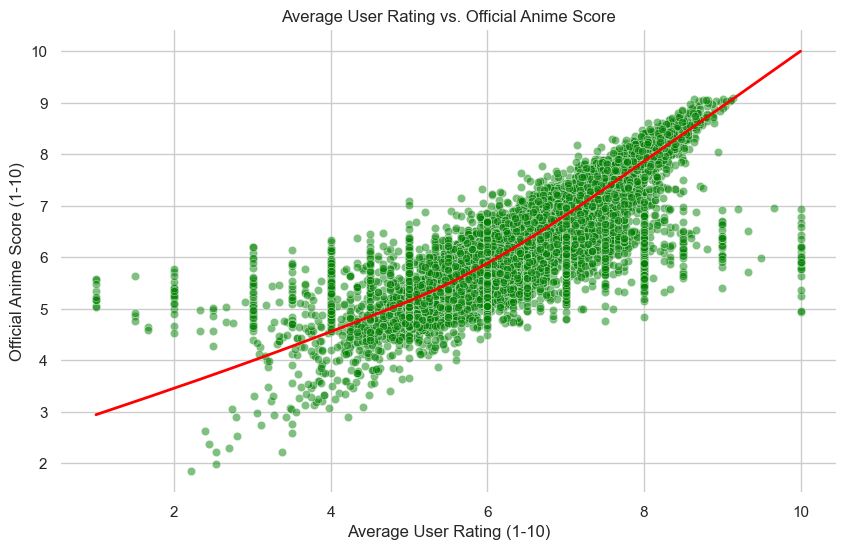

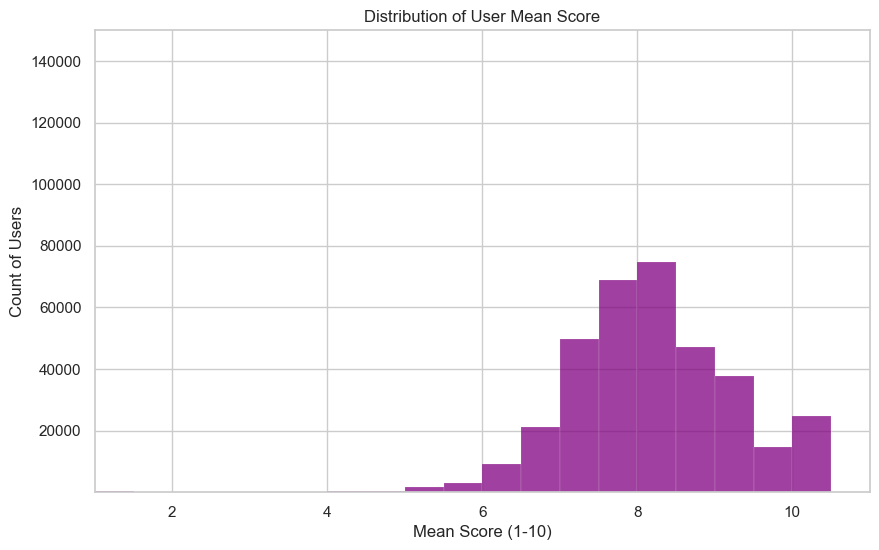

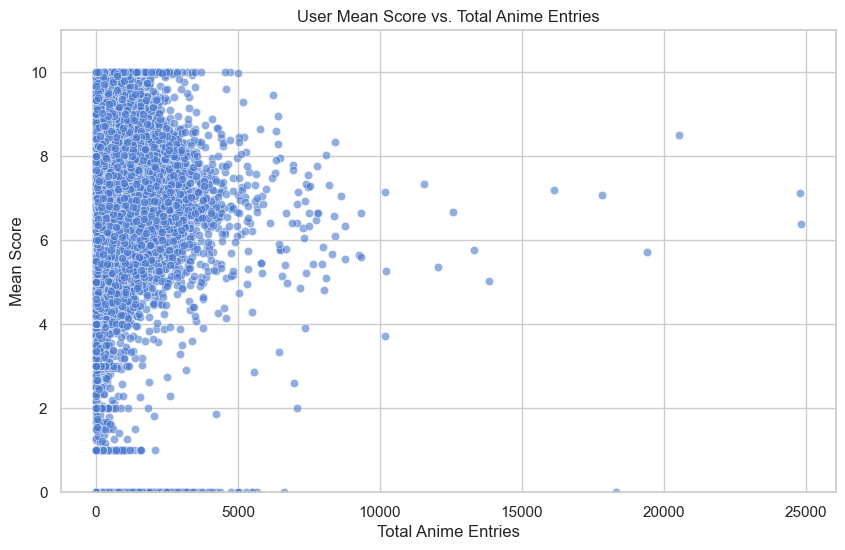

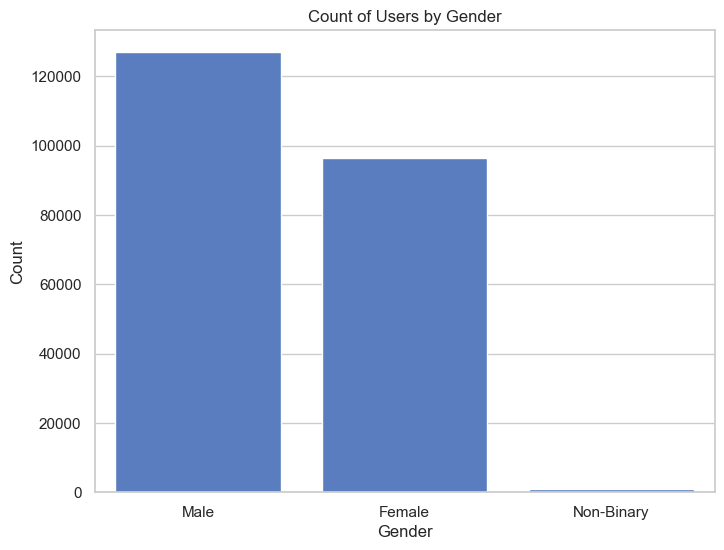

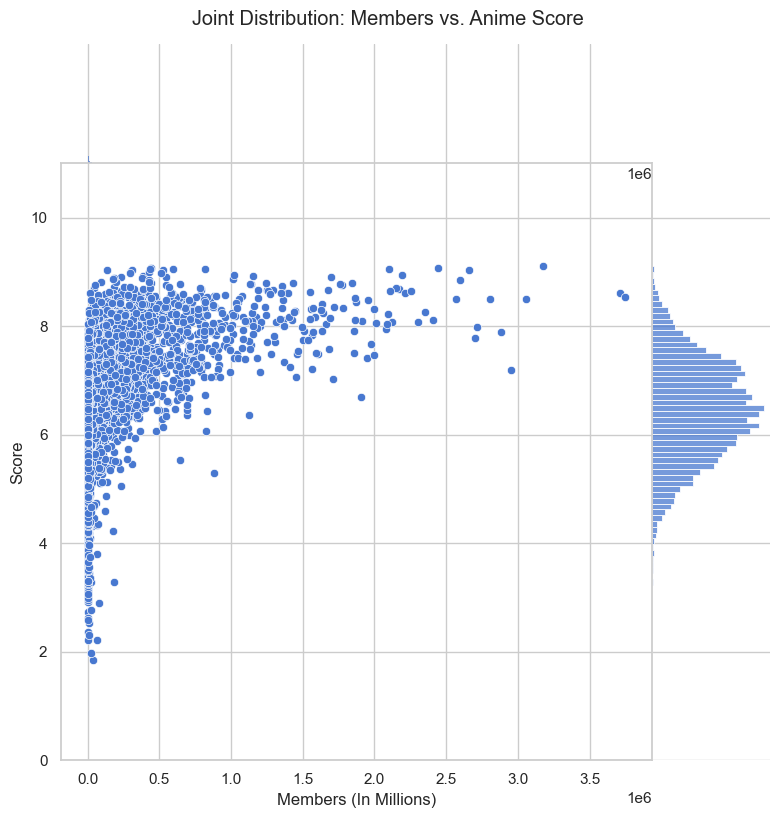

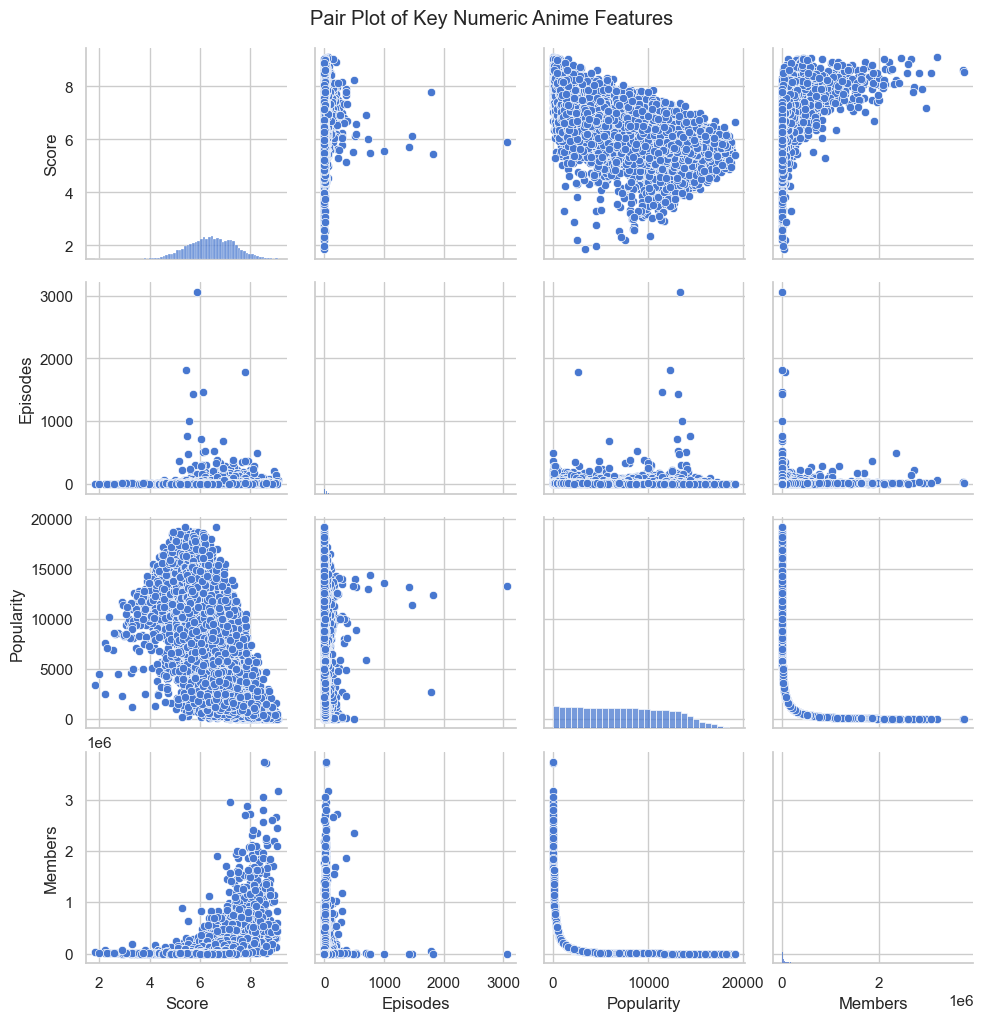

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

# Set Seaborn style
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size

# Loading the data
df_anime = pd.read_csv('anime-dataset-2023.csv')
df_user_details = pd.read_csv('users-details-2023.csv')
df_user_score = pd.read_csv('users-score-2023.csv')

# Checking out first few columns
print(df_anime.head())
print(df_user_details.head())
print(df_user_score.head())


# Convert numeric columns to proper data types if they aren't already
numeric_cols_anime = ['Score', 'Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']
for col in numeric_cols_anime:
    df_anime[col] = pd.to_numeric(df_anime[col], errors='coerce')


# Convert user details numeric columns if needed
numeric_cols_user = ['Days Watched', 'Mean Score', 'Watching', 'Completed', 
                     'On Hold', 'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched', 'Episodes Watched']
for col in numeric_cols_user:
    df_user_details[col] = pd.to_numeric(df_user_details[col], errors='coerce')

# Convert user_score rating to numeric if needed
df_user_score['rating'] = pd.to_numeric(df_user_score['rating'], errors='coerce')

df_anime = df_anime[df_anime['Type'] != 'UNKNOWN']
df_anime = df_anime[df_anime['Genres'] != 'UNKNOWN']


# Distribution of Anime Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df_anime, x='Score', binwidth=0.5, color='skyblue')
plt.title('Distribution of Anime Scores')
plt.xlabel('Score (1-10)')
plt.ylabel('Count of Anime')
plt.show()

# Distribution of Episodes
df_anime_filtered = df_anime[df_anime['Episodes'] > 0].copy()
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_anime_filtered, x='Episodes', color='salmon')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([1, 10, 100, 1000])
ax.set_xticklabels([1, 10, 100, 1000])
ax.set_yticks([1, 10, 100, 1000, 10000])
ax.set_yticklabels([1, 10, 100, 1000, 10000])
plt.title('Distribution of Anime Episodes (Log Scale)')
plt.xlabel('Number of Episodes')
plt.ylabel('Count of Anime')
plt.show()

# Most Common Anime Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df_anime, x='Type', order=df_anime['Type'].value_counts().index, palette='viridis')
plt.title('Count of Anime by Type')
plt.xlabel('Type of Anime')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 15 Genres
# Split Genres on comma, explode to get each genre individually
df_exploded = df_anime.assign(Genre=df_anime['Genres'].str.split(', ')).explode('Genre')
top_genres = df_exploded['Genre'].value_counts().head(15).index

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_exploded[df_exploded['Genre'].isin(top_genres)], 
    y='Genre', 
    order=top_genres,
    palette='cool'
)
plt.title('Top 15 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Top 10 Anime by MyAnimeList Rank
df_anime_ranked = df_anime.dropna(subset=['Rank']).copy()
df_anime_ranked = df_anime_ranked[df_anime_ranked['Rank']!=0]
df_top10_rank = df_anime_ranked.sort_values(by='Rank', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_rank, 
    x='Rank', 
    y='Name', 
    palette='Blues_r', 
    orient='h'
)
plt.title('Top 10 Anime by MyAnimeList Rank (1 = Best)')
plt.xlabel('Rank')
plt.ylabel('Anime Title')
plt.gca().invert_xaxis()  # So rank=1 shows on the left side
sns.despine(left=True, bottom=True)
plt.show()

# Top 10 Anime by Popularity
df_anime_popular = df_anime.dropna(subset=['Popularity']).copy()
df_anime_popular = df_anime_popular[df_anime_popular['Popularity']!=0]
df_top10_popular = df_anime_popular.sort_values(by='Popularity', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_popular, 
    x='Popularity', 
    y='Name', 
    palette='Greens_r',
    orient='h'
)
plt.title('Top 10 Anime by Popularity (1 = Most Popular)')
plt.xlabel('Popularity Rank')
plt.ylabel('Anime Title')
plt.gca().invert_xaxis() 
sns.despine(left=True, bottom=True)
plt.show()

# Top 10 Anime by Average User Rating
df_avg_rating = (
    df_merged
    .dropna(subset=['rating'])
    .groupby('anime_id', as_index=False)['rating']
    .mean()
    .rename(columns={'rating':'avg_user_rating'})
)
df_avg_rating = pd.merge(df_avg_rating, df_anime[['anime_id', 'Name']], on='anime_id', how='left')
df_top10_avg_rating = df_avg_rating.sort_values(by='avg_user_rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_avg_rating, 
    x='avg_user_rating', 
    y='Name', 
    palette='Oranges_r',
    orient='h'
)
plt.title('Top 10 Anime by Average User Rating')
plt.xlabel('Average User Rating')
plt.ylabel('Anime Title')
sns.despine(left=True, bottom=True)
plt.show()

# Top 10 Anime by Number of Favorites
df_anime_favs = df_anime.dropna(subset=['Favorites']).copy()
df_top10_favs = df_anime_favs.sort_values(by='Favorites', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_favs,
    x='Favorites',
    y='Name',
    palette='PuBuGn_r', 
    orient='h'
)
plt.title('Top 10 Anime by Number of Favorites')
plt.xlabel('Number of Favorites')
plt.ylabel('Anime Title')
sns.despine(left=True, bottom=True)
plt.show()

# Correlation Heatmap of Numeric Anime Columns
numeric_subset = df_anime[['Score','Episodes','Rank','Popularity','Favorites','Scored By','Members']].dropna()
corr = numeric_subset.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='RdBu', center=0)
plt.title('Correlation Heatmap of Numeric Anime Features')
plt.show()

# Scatter Plot - Score vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_anime, x='Popularity', y='Score', alpha=0.7)
plt.title('Anime Score vs. Popularity')
plt.xlabel('Popularity (lower = more popular rank)')
plt.ylabel('Score')
plt.show()

# Box Plot - Score by Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_anime, x='Type', y='Score', palette='Set2')
plt.title('Distribution of Scores by Anime Type')
plt.xlabel('Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

df_merged = pd.merge(df_user_score, df_anime, on='anime_id', how='inner')

# Distribution of User Ratings (from user-score-2023)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='rating', binwidth=1, color='darkorange')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating (1-10)')
plt.ylabel('Count (In Millions)')
plt.show()

# Compare Official Score vs Average User Rating
df_anime_avg_rating = (
    df_merged
    .dropna(subset=['rating'])
    .groupby('anime_id', as_index=False)['rating']
    .mean()
    .rename(columns={'rating': 'avg_user_rating'})
)

# 2Merge back with anime info to get official score & name
df_compare = pd.merge(
    df_anime_avg_rating,
    df_anime[['anime_id', 'Score', 'Name']],
    on='anime_id',
    how='left'
).dropna(subset=['Score'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_compare, x='avg_user_rating', y='Score', alpha=0.5, color='green')

# Add a regression line for clear visualization of the trend
sns.regplot(
    data=df_compare, 
    x='avg_user_rating', 
    y='Score', 
    scatter=False, 
    lowess=True, 
    line_kws={'color':'red', 'linewidth':2}
)

plt.title('Average User Rating vs. Official Anime Score')
plt.xlabel('Average User Rating (1-10)')
plt.ylabel('Official Anime Score (1-10)')
sns.despine(left=True, bottom=True)
plt.show()


df_user_merged = pd.merge(df_user_score, df_user_details, left_on='user_id', right_on='Mal ID', how='inner')

# Distribution of User Mean Score (from user-details-2023)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_user_details, x='Mean Score', binwidth=0.5, color='purple')
plt.xlim(1,11)
plt.ylim(1, 150000)
plt.title('Distribution of User Mean Score')
plt.xlabel('Mean Score (1-10)')
plt.ylabel('Count of Users')
plt.show()

# Scatter Plot - User Mean Score vs Total Entries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_user_details, x='Total Entries', y='Mean Score', alpha=0.6)
plt.ylim(0,11)
plt.title('User Mean Score vs. Total Anime Entries')
plt.xlabel('Total Anime Entries')
plt.ylabel('Mean Score')
plt.show()

# User Gender Count 
plt.figure(figsize=(8, 6))
sns.countplot(data=df_user_details, x='Gender', order=df_user_details['Gender'].value_counts().index)
plt.title('Count of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Joint Plot - Official Anime Score vs # of Members
# A joint plot shows a 2D scatter with histograms on each axis
sns.jointplot(data=df_anime, x='Members', y='Score', kind='scatter', height=8, space=0)
plt.xlabel('Members (In Millions)')
plt.ylim(0,11)
plt.suptitle('Joint Distribution: Members vs. Anime Score', y=1.02)
plt.show()

# Pair Plot of Selected Anime Columns
# This can reveal relationships among multiple numeric features
cols_for_pairplot = ['Score', 'Episodes', 'Popularity', 'Members']
sns.pairplot(data=df_anime[cols_for_pairplot].dropna())
plt.suptitle('Pair Plot of Key Numeric Anime Features', y=1.02)
plt.show()
